&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).

In [1]:
# enable high-res images in notebook 
%config InlineBackend.figure_format = 'retina'

In [2]:
%matplotlib inline

# 11. Natural Language Processing (NLP)

# 11.1 Introduction
* Natural language communication examples    
    * **Conversations** between people 
    * Reading/writing **text messages**
    * Learning a **foreign language**  
    * Using a **smartphone** to read menus in other languages
* NLP is performed on **text collections** (**corpora**, plural of **corpus**)
    * **Social media posts** (Tweets, Facebook posts, etc.)
    * Documents, books, news articles, movie reviews
    * And more

<hr style="height:2px; border:none; color:#000; background-color:#000;">

#### Machine Learning and Deep Learning Natural Language Applications
* **Sentiment analysis**
* **Speech synthesis** (text-to-speech)
* **Speech recognition** (speech-to-text)
* **Inter-language text-to-text and speech-to-speech translation**
* **Automatic closed captioning**
* **Bots answering natural language questions** 
* **Text summarization**
* **Text simplification**
* **Recommender systems** (“if you liked this movie, you might also like…”)
* **Classifying articles by categories**
* **Topic modeling**—finding the **topics** discussed in documents
* **Speech to sign language and vice versa**—to enable a conversation with a hearing-impaired person
* **Lip reader technology**—for people who can’t speak, convert lip movement to text or speech to enable conversation

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# 11.2 [TextBlob](https://textblob.readthedocs.io/)
### Install **TextBlob**
* `conda install -c conda-forge textblob`
* Next download **NLTK corpora** required by Textblob
> `ipython -m textblob.download_corpora`

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.1 Create a TextBlob—The fundamental Class for NLP

In [3]:
from textblob import TextBlob

In [4]:
text = 'Yesterday was a beautiful day. Tomorrow looks like bad weather.'

In [5]:
blob = TextBlob(text)

In [6]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.2 Tokenizing Text into Sentences and Words 

In [7]:
blob.sentences  # returns list of Sentence objects

[Sentence("Yesterday was a beautiful day."),
 Sentence("Tomorrow looks like bad weather.")]

In [8]:
blob.words  # returns a WordList (subclass of list) of Words; punctuation removed

WordList(['Yesterday', 'was', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.3 Parts-of-Speech (POS) Tagging
* `TextBlob` uses [**pattern library**](https://github.com/clips/pattern) to determine **parts-of-speech**
    * Pattern's [63 parts-of-speech tags](https://www.clips.uantwerpen.be/pages/MBSP-tags)

In [9]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [10]:
blob.tags  # list of (word, part-of-speech-tag) tuples

[('Yesterday', 'NN'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.4 Extracting Noun Phrases

In [11]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [12]:
blob.noun_phrases  # WordList of Word objects 

WordList(['yesterday', 'beautiful day', 'tomorrow', 'bad weather'])

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.5 Sentiment Analysis on `TextBlob`s and `Sentence`s
* **`polarity`** is the **sentiment** — from **`-1.0` (negative)** to **`1.0` (positive)** &mdash; **`0.0`** is **neutral**
* **`subjectivity`** &mdash; **0.0 (objective)** to **1.0 (subjective)**

In [13]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [14]:
blob.sentiment  # Sentiment object positive/negative and objective/subjective

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

In [15]:
for sentence in blob.sentences:
    print(f'{sentence}\nsentiment: {sentence.sentiment}\n')

Yesterday was a beautiful day.
sentiment: Sentiment(polarity=0.85, subjectivity=1.0)

Tomorrow looks like bad weather.
sentiment: Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)



<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.7 Language Detection and Translation (1 of 3)
* **Google Translate**, **Microsoft Bing Translator** and others can translate among scores of languages

In [16]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [17]:
blob.detect_language()  # uses Google Translate; 'en' means English

'en'

* [ISO-639-1 language codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)
* [Google Translate’s supported languages](https://cloud.google.com/translate/docs/languages)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.7 Language Detection and Translation (2 of 3)

In [18]:
spanish = blob.translate(to='es')  # translate to target language Spanish ('es') 

In [19]:
spanish

TextBlob("Ayer fue un hermoso día. Mañana parece mal tiempo.")

In [20]:
chinese = blob.translate(to='zh')  # translate to Simplified Chinese ('zh') 

In [21]:
chinese  

TextBlob("昨天是美好的一天。明天看起来天气不好。")

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.7 Language Detection and Translation (3 of 3)
* Notice **differences** in the **text translated back to English** from Spanish and Chinese 

In [22]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [23]:
spanish.translate()  # autodetect source language; translates to English by default

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [24]:
chinese.translate()

TextBlob("Yesterday was a good day. The weather looks bad tomorrow.")

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.9 Spell Checking and Correction (1 of 2)

In [25]:
from textblob import Word

In [26]:
word = Word('theyr')

In [27]:
%precision 2 

'%.2f'

In [28]:
word.spellcheck()  # returns tuples of corrections and confidence values

[('they', 0.57), ('their', 0.43)]

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.9 Spell Checking and Correction (2 of 2)
* `TextBlob`s, `Sentence`s and `Word`s all have a **`correct` method** 
* **Corrects spelling** using correctly spelled word with **highest confidence value**

In [29]:
word.correct()  # chooses word with the highest confidence value

'they'

In [30]:
sentence = TextBlob('Ths sentense has missplled wrds.')

In [31]:
sentence.correct() 

TextBlob("The sentence has misspelled words.")

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.11 Word Frequencies via `word_counts` Dictionary in a `TextBlob` (1 of 2)
* **Project Gutenberg's [60,000+ free e-books](https://www.gutenberg.org)**
    * Great source of text corpora for analysis
    * Read their [Terms of Use](https://www.gutenberg.org/wiki/Gutenberg:Terms_of_Use)
    * **Out of copyright** in the **United States** 
* We **downloaded** the **Plain Text UTF-8** versions of [Shakespeare’s *Romeo and Juliet*](https://www.gutenberg.org/ebooks/1513) and 
[Christopher Marlowe's *Edward the Second*](https://www.gutenberg.org/ebooks/20288)
    * Saved as **`RomeoAndJuliet.txt`** and **`EdwardTheSecond.txt`**
    * **Note**: For analysis, we **removed** the **Project Gutenberg text** before and after the play in each file

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.11 Word Frequencies via `word_counts` Dictionary in a `TextBlob` (2 of 3)

In [32]:
from pathlib import Path

In [33]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())  # load Romeo and Juliet

* **Which word appears more in the play&mdash;"Romeo" or "Juliet"?** 

In [34]:
blob.word_counts['juliet'] 

190

In [35]:
blob.word_counts['romeo']

315

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.13 Deleting Stop Words (1 of 2)
* Less significant words&mdash;like "a", "an", "the", pronouns, etc.&mdash;that are often removed before text analysis
* Returned by [NLTK **`stopwords` module's `words` function**](https://www.nltk.org/book/ch02.html)

In [36]:
import nltk

In [37]:
nltk.download('stopwords')  # must download before first use

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pauldeitel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.13 Deleting Stop Words (2 of 2)

In [38]:
from nltk.corpus import stopwords

In [39]:
stops = stopwords.words('english')  # load the english list

In [40]:
%pprint

Pretty printing has been turned OFF


In [41]:
stops

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
blob = TextBlob('Today is a beautiful day.')

In [43]:
[word for word in blob.words if word not in stops]  # keep anything that's not a stop word

['Today', 'beautiful', 'day']

[List comprehensions presentation in my **Python Fundamentals videos**](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson05_11)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# 11.3 Visualizing Word Frequencies with Bar Charts and Word Clouds (1 of 4)

In [44]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())  # load play

* Eliminate stopwords
* `item[0]` is the **word in each tuple** returned by `blob.word_counts.items()`

In [45]:
items = blob.word_counts.items()  # iterator for word-frequency tuples 

In [46]:
items = [item for item in items if item[0] not in stops and item[0] != '’']

In [47]:
items[:5]

[('tragedy', 1), ('romeo', 315), ('juliet', 190), ('william', 1), ('shakespeare', 1)]

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Sorting the Top 20 Words in Descending Order by Frequency (2 of 4)

In [48]:
from operator import itemgetter  # used to specify tuple element to sort by

In [49]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)  # descending

* **`key=itemgetter(1)`**&mdash;sort tuples by **frequency** (each tuple's element `1`)

In [50]:
top20 = sorted_items[0:20]

In [51]:
top20

[('romeo', 315), ('thou', 278), ('juliet', 190), ('thy', 170), ('capulet', 163), ('nurse', 149), ('love', 148), ('thee', 138), ('lady', 117), ('shall', 110), ('friar', 105), ('come', 94), ('mercutio', 88), ('lawrence', 82), ('good', 80), ('benvolio', 79), ('tybalt', 79), ('enter', 75), ('go', 75), ('night', 73)]

In [52]:
%pprint

Pretty printing has been turned ON


<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Convert top20 to a `DataFrame` for Visualization (3 of 4)
* **pandas library** used frequently in later case studies 

In [53]:
import pandas as pd

In [54]:
df = pd.DataFrame(top20, columns=['word', 'count'])  

In [55]:
df

,word,count
0,romeo,315
1,thou,278
2,juliet,190
3,thy,170
4,capulet,163
5,nurse,149
6,love,148
7,thee,138
8,lady,117
9,shall,110


<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Visualizing the `DataFrame` (4 of 4)
* **`bar` method** of the `DataFrame`’s **`plot` property** creates and displays a **Matplotlib bar chart**

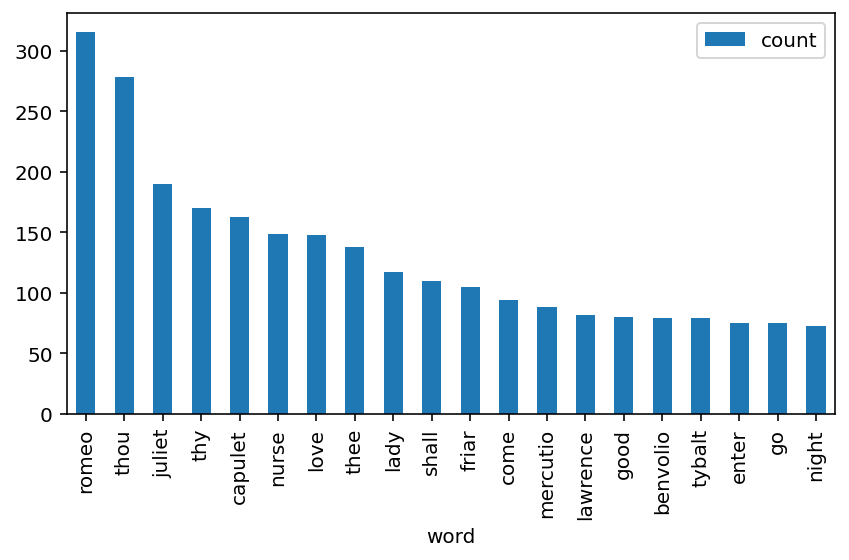

In [56]:
import matplotlib.pyplot as plt
axes = df.plot.bar(x='word', y='count')
plt.gcf().tight_layout()  # compress chart to ensure all components fit 

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.3.2 Visualizing the Top 200 Words in  **Romeo and Juliet** as a Word Cloud (1 of 4)
* `conda install -c conda-forge wordcloud`
* Created by **Andreas Mueller**&mdash;author of [**"Introduction to Machine Learning with Python"**](https://amzn.to/2JTBKOp) and core developer of **scikit-learn machine-learning library**
    
### Loading the Text

In [57]:
text = Path('RomeoAndJuliet.txt').read_text()

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Loading the Mask Image that Specifies the Word Cloud’s Shape (2 of 4)
* [**`wordcloud` module’s**](https://github.com/amueller/word_cloud) **`WordCloud` class** uses **matplotlib** under the hood 
* Fills non-white areas of a **mask image** with text
* Load the mask using **`imageio` module's `imread` function** 

In [58]:
import imageio  # bundled with Anaconda

In [59]:
mask_image = imageio.imread('mask_heart.png')  # returns NumPy array of image's data

[NumPy discussed in Lesson 7, Array-Oriented Programming, of my **Python Fundamentals LiveLessons** videos](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson07_00)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Configuring the WordCloud Object (3 of 4)

In [60]:
from wordcloud import WordCloud   

In [61]:
wordcloud = WordCloud(width=1000, height=1000, 
    colormap='prism', mask=mask_image, background_color='white')

* `WordCloud` assigns **random colors** from a **color map**
* [Matplotlib’s named color maps](https://matplotlib.org/examples/color/colormaps_reference.html)
* [`WordCloud`’s keyword arguments and their default values](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Generating the Word Cloud, Saving It and Displaying It (4 of 4)

In [62]:
wordcloud = wordcloud.generate(text)  

* Removes stop words
* Calculates the word frequencies
* Uses up to **200 words** by default
    * **`max_words` keyword argument** can specify any number

In [63]:
wordcloud = wordcloud.to_file('RomeoAndJulietHeart.png')

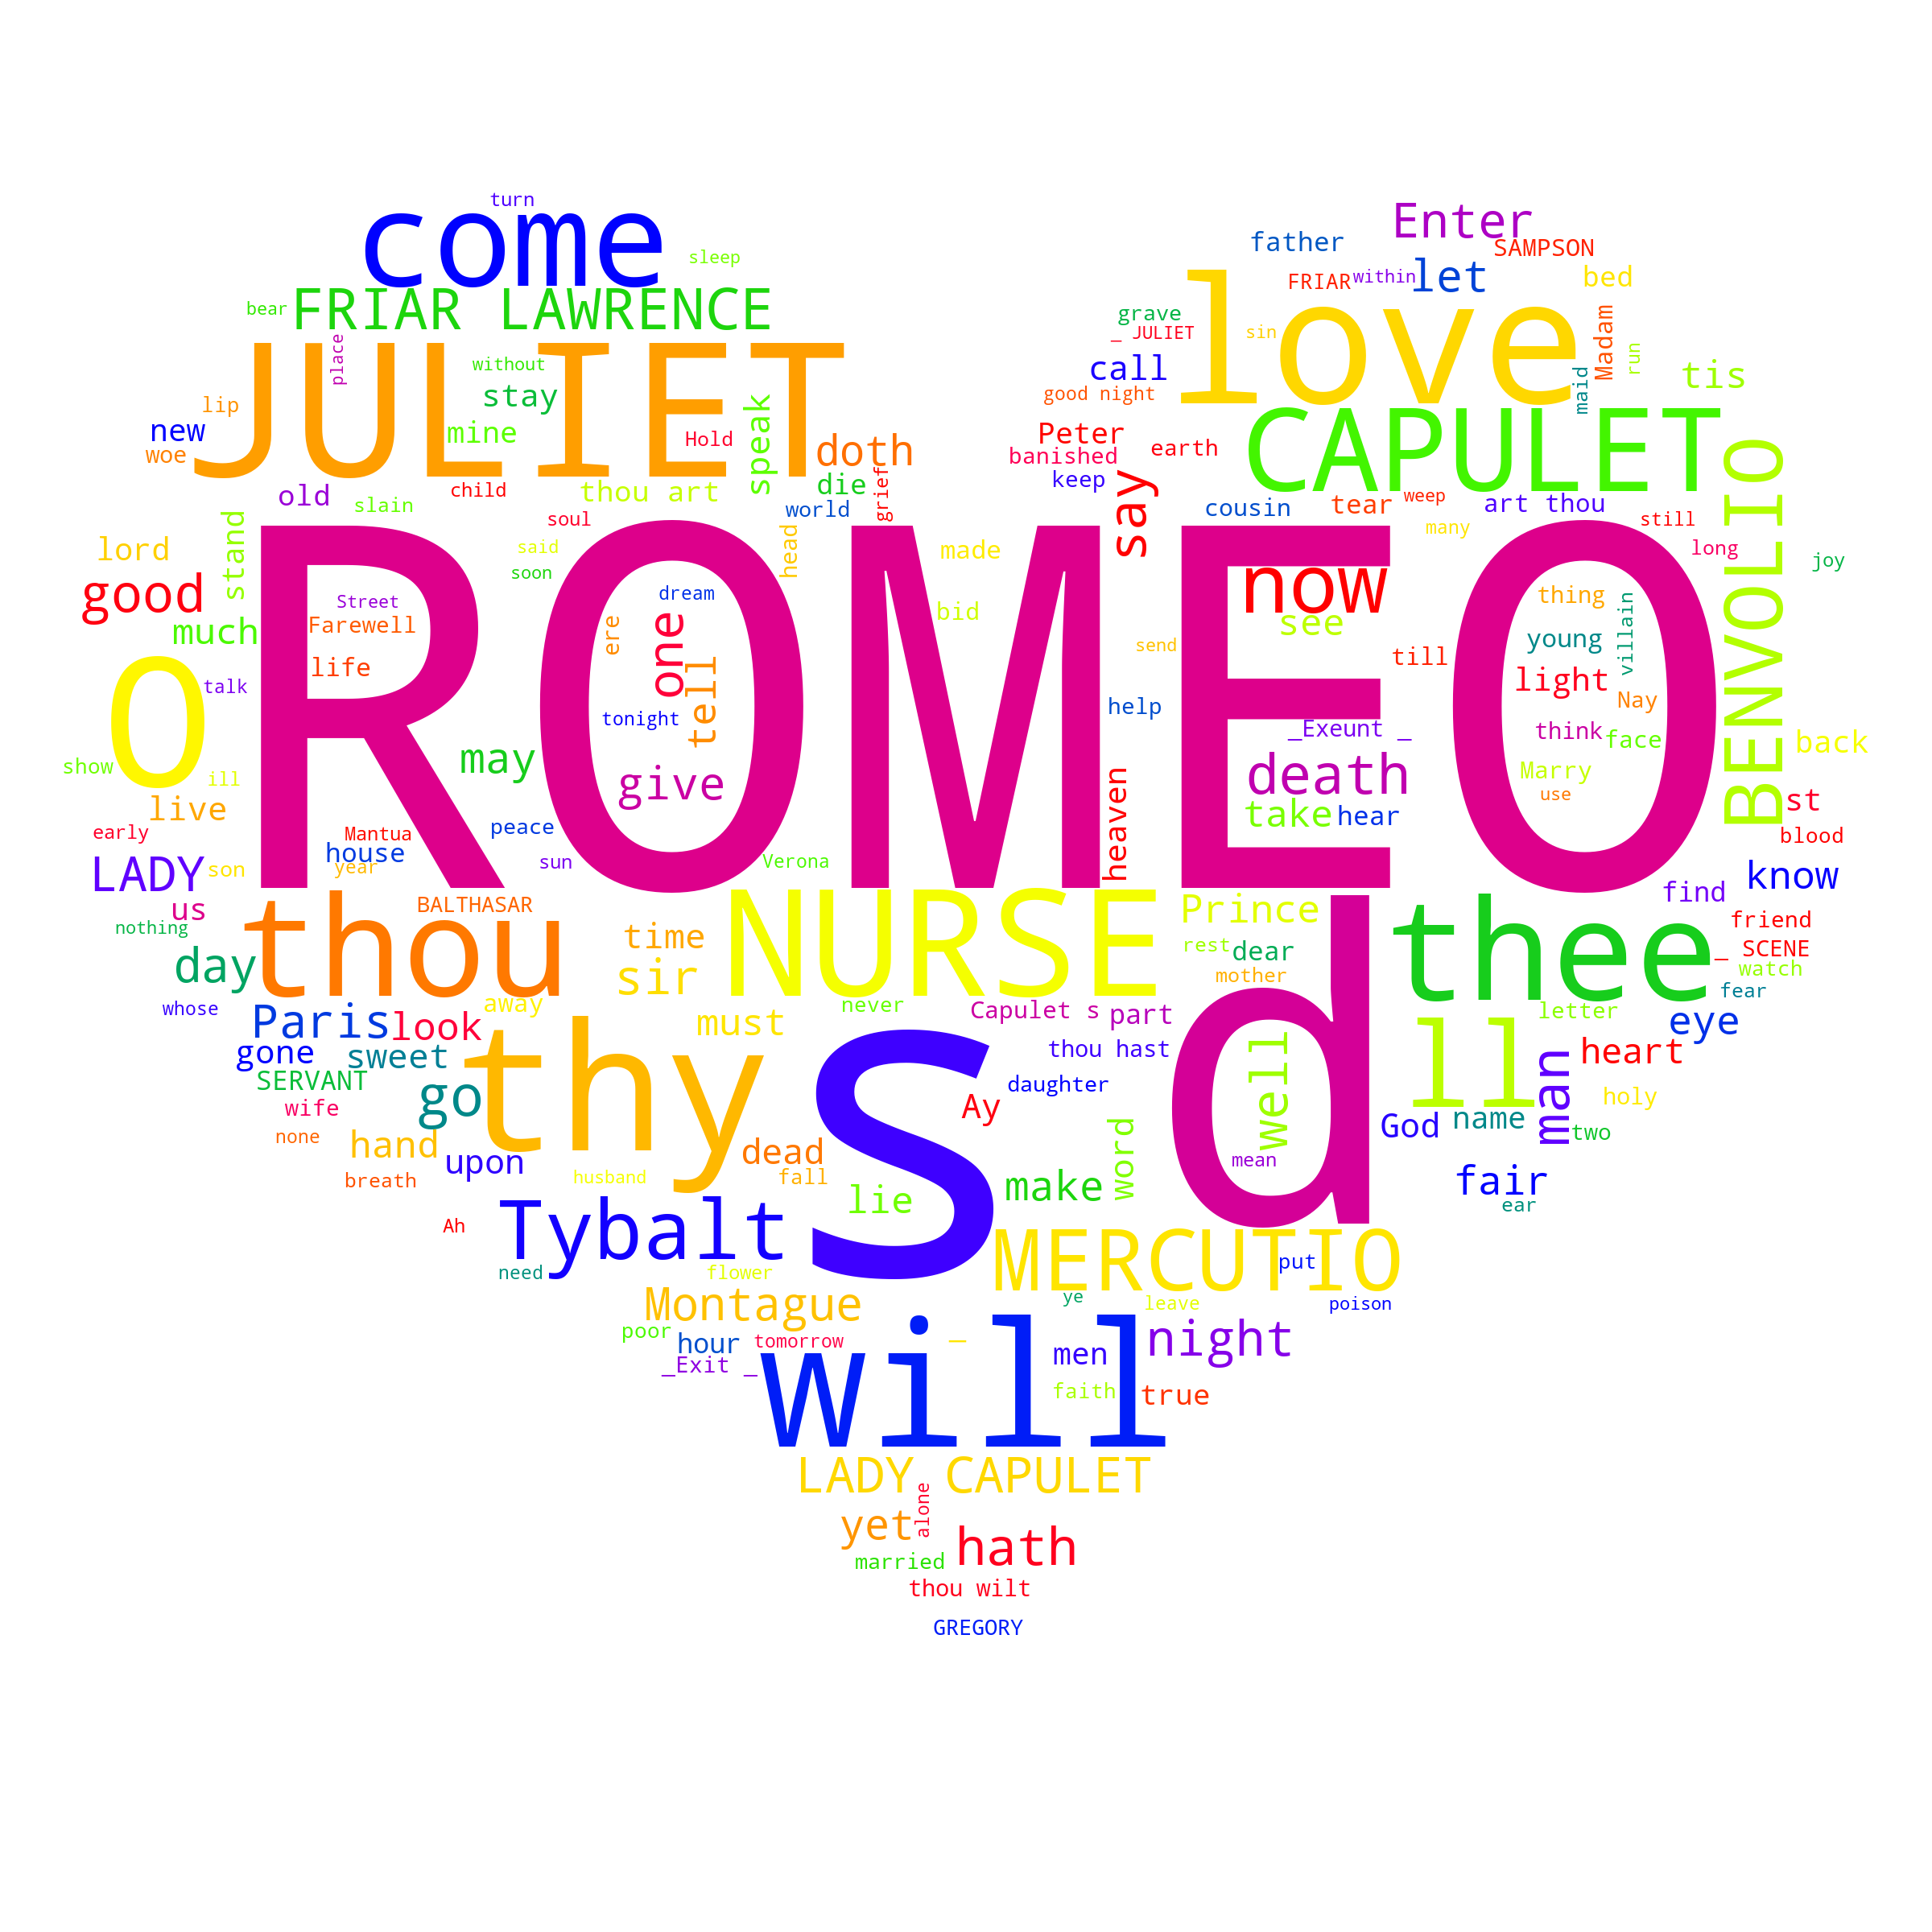

In [64]:
from IPython.display import Image
Image(filename='RomeoAndJulietHeart.png', width=400)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# 11.5 Named Entity Recognition with [**spaCy**](https://spacy.io/) (1 of 4)
* Attempts to **locate and categorize items** that can help **determine what a text is about**
    * **dates**, **times**, **quantities**, **places**, **people**, **things**, **organizations** and more 
* [spaCy Quickstart guide](https://spacy.io/usage/models#section-quickstart)
* `conda install -c conda-forge spacy`
* Download spaCy's **English (`en_core_web_sm`) model** for processing text  
>```
ipython -m spacy download en_core_web_sm
```

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Loading the Language Model with the `spacy` Module’s **`load` Function** (2 of 4)

In [65]:
import spacy

In [66]:
nlp = spacy.load('en_core_web_md')  # loads English language model

* spaCy docs recommend the **variable name `nlp`**.

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Creating a spaCy Doc (3 of 4)
* Use the **`nlp` object** to create a [**spaCy `Doc`** object](https://spacy.io/api/doc) representing the **document** to process. 

In [67]:
document = nlp('In 1994, Tim Berners-Lee founded the ' + 
    'World Wide Web Consortium which is devoted to ' +
    'developing web technologies')

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Getting the Named Entities Via a `Doc`’s **`ents` Property** (4 of 4)
* Returns tuple of spaCy **`Span`** objects representing the **named entities** 
* [**`Span`** properties](https://spacy.io/api/span)
* Display **`text`** (the **entity's text**) and **`label_`** (the **kind of entity**)

In [68]:
for entity in document.ents:
    print(f'{entity.text}: {entity.label_}')

1994: DATE
Tim Berners-Lee: PERSON
the World Wide Web Consortium: ORG


<hr style="height:2px; border:none; color:#000; background-color:#000;">

# 11.7 Other NLP Libraries and Tools 
[See this section on O'Reilly](https://learning.oreilly.com/library/view/Python+for+Programmers,+First+Edition/9780135231364/ch11.xhtml#ch11lev1sec7)

<!--
Additional mostly free and open source NLP libraries and APIs: 
* **Gensim**—**Similarity detection** and **topic modeling**
* **Google Cloud Natural Language API**—Cloud-based API for NLP tasks such as **named entity recognition**, **sentiment analysis**, **parts-of-speech analysis and visualization**, **determining content categories** and more
* **Microsoft Linguistic Analysis API**
* **Bing sentiment analysis**—**Microsoft’s Bing search engine** now uses **sentiment** in its **search results**
* **PyTorch NLP**—**Deep learning library** for **NLP**  
* **Stanford CoreNLP**—A **Java NLP library**, which also provides a **Python wrapper**. Includes **corefererence resolution**, which finds all references to the same thing.
* **Apache OpenNLP**—Another **Java-based NLP library** for common tasks, including **coreference resolution**. **Python wrappers** are available.
* **PyNLPl** (pineapple)—**Python NLP library** 
* **SnowNLP**—**Python library** that simplifies **Chinese text processing**
* **KoNLPy**—**Korean language NLP**
* **`stop-words`**—**Python library** with **stop words for many languages**. We used NLTK’s stop words lists in this chapter. 
* **`TextRazor`**—A **paid cloud-based NLP API** that provides a **free tier**
-->

# 11.9 Natural Language Datasets 
[See this section on O'Reilly](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/ch11.xhtml#ch11lev1sec9)

<!--
* **Social media posts**&mdash;via APIs like the Twitter API we'll demonstrate next.
* **Wikipedia**—some or all of Wikipedia (`https://meta.wikimedia.org/wiki/Datasets`).
* **IMDB (Internet Movie Database)**—various **movie and TV datasets** are available.
* **UCIs text datasets**—many datasets, including the **Spambase** dataset.
* **Jeopardy! dataset**—200,000+ questions from the Jeopardy! TV show. A milestone in AI occurred in 2011 when IBM Watson famously beat two of the world’s best Jeopardy! players.
* [**Natural language processing datasets**](https://machinelearningmastery.com/datasets-natural-language-processing/)
* [**NLTK data**](https://www.nltk.org/data.html)
* **Sentiment labeled sentences data set** (from sources including **IMDB.com**, **amazon.com**, **yelp.com**) 
* [**Registry of Open Data on AWS**](https://registry.opendata.aws)—a searchable directory of **datasets hosted on Amazon Web Services**.
* [**Amazon Customer Reviews Dataset**](https://registry.opendata.aws/amazon-reviews/)—130+ million product reviews.
* and many more!-->

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# More Info 
* See Lesson 11 in [**Python Fundamentals LiveLessons** here on O'Reilly Online Learning](https://learning.oreilly.com/videos/python-fundamentals/9780135917411)
* See Chapter 11 in [**Python for Programmers** on O'Reilly Online Learning](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/)
* See Chapter 12 in [**Intro Python for Computer Science and Data Science** on O'Reilly Online Learning](https://learning.oreilly.com/library/view/intro-to-python/9780135404799/)
* Interested in a print book? Check out:

| Python for Programmers<br>(640-page professional book) | Intro to Python for Computer<br>Science and Data Science<br>(880-page college textbook)
| :------ | :------
| <a href="https://amzn.to/2VvdnxE"><img alt="Python for Programmers cover" src="../images/PyFPCover.png" width="150" border="1"/></a> | <a href="https://amzn.to/2LiDCmt"><img alt="Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud" src="../images/IntroToPythonCover.png" width="159" border="1"></a>

>Please **do not** purchase both books&mdash;_Python for Programmers_ is a subset of _Intro to Python for Computer Science and Data Science_

&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).